# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install scipy
#!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q=" 
mid_url = "&units=imperial&appid="
i=0

#log on next kernel



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# set up list to hold response info
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_t = []
wind = []


i=0
for city in cities:
    worked = True
    weather_data = requests.get(base_url+city+mid_url+weather_api_key)
    weather_data = weather_data.json()  
    
    #append lists with city info
    try:
        city_name.append(weather_data["name"])
        city_id.append(i)
        cloudiness.append(weather_data["clouds"]["all"])
        country.append(weather_data["sys"]["country"])
        date.append(weather_data["dt"])
        humidity.append(weather_data["main"]["humidity"])
        lat.append(weather_data["coord"]["lat"])
        lng.append(weather_data["coord"]["lon"])
        max_t.append(weather_data["main"]["temp_max"])
        wind.append(weather_data["wind"]["speed"])
        worked = True
    except:
        print(f"{city} is not on the list and will be skipped!")
        worked = False
    
    
    #limit data pulls for code dev and testing
    #if i == 200:
        #break      
    
    if worked:
        
        #print log
        print(f"{i} : {city}")
        
        i+=1
        
        
#add data to dataframe
weather_df = pd.DataFrame({
    "City_ID":city_id, 
    "City":city_name,
    "Cloudiness":cloudiness,
    "Country":country,
     "Date":date,
      "Humidity":humidity,
       "Lat":lat,
    "Lng":lng,
    "Max Temp":max_t,
     "Wind Speed":wind
})
    
#write data to csv
weather_df.to_csv(output_data_file, index=False)   

#print data frame
weather_df



0 : tutoia
1 : abidjan
2 : rikitea
3 : nedjo
4 : kiama
tumannyy is not on the list and will be skipped!
5 : ushuaia
6 : kuching
mys shmidta is not on the list and will be skipped!
7 : lebu
8 : saint-philippe
barentsburg is not on the list and will be skipped!
9 : mataura
10 : san jose
11 : carnarvon
12 : kamina
shaartuz is not on the list and will be skipped!
amderma is not on the list and will be skipped!
13 : new norfolk
14 : tazovskiy
15 : tasiilaq
16 : avarua
17 : punta arenas
18 : cape town
19 : suez
20 : hobyo
21 : tautira
22 : kaitangata
23 : albany
24 : rokupr
illoqqortoormiut is not on the list and will be skipped!
skalistyy is not on the list and will be skipped!
25 : rio gallegos
26 : hermanus
27 : longjiang
28 : gat
29 : hilo
30 : klaksvik
31 : ponta do sol
32 : hobart
33 : bethel
naugarzan is not on the list and will be skipped!
34 : atuona
35 : churapcha
36 : contamana
37 : yellowknife
38 : pisco
39 : kimamba
40 : qaanaaq
41 : tyukalinsk
42 : riyadh
43 : port alfred
44 : 

414 : tyukhtet
bolungarvik is not on the list and will be skipped!
415 : rosarito
416 : podgornoye
417 : parral
418 : uva
419 : rupert
420 : goderich
taburi is not on the list and will be skipped!
linchuan is not on the list and will be skipped!
421 : caravelas
422 : vostok
423 : kenora
424 : batemans bay
425 : syracuse
426 : charlestown
427 : kingman
428 : parry sound
429 : saint-pierre
430 : solano
431 : cayenne
432 : adrar
433 : batagay
labutta is not on the list and will be skipped!
434 : gold coast
435 : shu
436 : fukue
437 : la suiza
umzimvubu is not on the list and will be skipped!
vaitupu is not on the list and will be skipped!
438 : half moon bay
439 : natalinsk
440 : narsaq
441 : parambu
442 : yeppoon
443 : horsham
444 : toyooka
445 : tessalit
446 : kharovsk
447 : mega
448 : gilbues
449 : havelock
450 : eureka
451 : sao joao da barra
452 : khuzhir
453 : trinidad
454 : charters towers
cazaje is not on the list and will be skipped!
455 : lemoore
456 : faya
457 : dunedin
458 : y

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Tutóia,75,BR,1586029908,83,-2.76,-42.27,84.20,13.87
1,1,Abidjan,75,CI,1586029689,79,5.31,-4.02,84.20,11.41
2,2,Rikitea,45,PF,1586029671,80,-23.12,-134.97,76.28,15.43
3,3,NEDJO,99,ET,1586029908,22,9.50,35.50,67.48,2.48
4,4,Kiama,2,AU,1586029909,58,-34.68,150.87,57.20,13.87
...,...,...,...,...,...,...,...,...,...,...
568,568,Beloha,100,MG,1586029989,75,-25.17,45.05,69.67,17.76
569,569,Kodīnar,0,IN,1586029989,61,20.79,70.70,77.11,11.88
570,570,Bondo,1,CD,1586029989,75,3.81,23.69,73.65,0.83
571,571,Mouila,100,GA,1586029989,90,-1.87,11.06,72.54,1.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

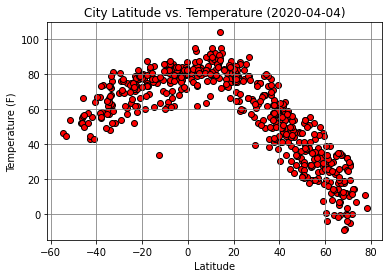

In [5]:
#get specific date for printing
from datetime import date
today = date.today()


plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor="red", edgecolors="black")
plt.title(f"City Latitude vs. Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(color="grey")
plt.savefig("output_data/LatitudeVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

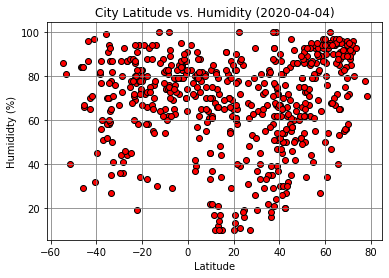

In [6]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor="red", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humididty (%)")
plt.grid(color="grey")
plt.savefig("output_data/LatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

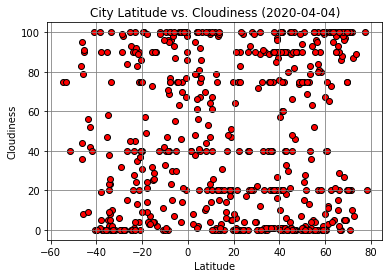

In [7]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor="red", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(color="grey")
plt.savefig("output_data/LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

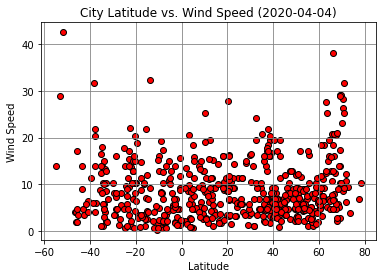

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor="red", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(color="grey")
plt.savefig("output_data/LatitudeVsWind Speed.png")
plt.show()

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregplot(xaxis, yaxis, xlabel, ylabel, title, location):
    m_slope, m_int, m_r, m_p, m_std_err = linregress(xaxis, yaxis, )
    m_fit = m_slope * xaxis + m_int
    plt.scatter(xaxis, yaxis)
    plt.plot(xaxis,m_fit,"--")
    plt.xticks(xaxis, rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if location == "N":
        plt.xticks(np.arange(0, 91, step=30))
    else:
        plt.xticks(np.arange(-90, 0, step=30))
        
    plt.show()


In [10]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = weather_df[weather_df["Lat"]>=0]
southern_df = weather_df[weather_df["Lat"]<0]

northern_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,1,Abidjan,75,CI,1586029689,79,5.31,-4.02,84.20,11.41
3,3,NEDJO,99,ET,1586029908,22,9.50,35.50,67.48,2.48
6,6,Kuching,40,MY,1586029639,94,1.55,110.33,77.00,2.24
10,10,San Jose,75,US,1586029709,58,37.34,-121.89,57.99,12.75
14,14,Tazovsky,100,RU,1586029910,96,67.47,78.70,34.03,20.47
...,...,...,...,...,...,...,...,...,...,...
566,566,Pacifica,90,US,1586029988,93,37.61,-122.49,57.99,17.22
567,567,Hay River,40,CA,1586029989,76,60.82,-115.80,-4.00,9.17
569,569,Kodīnar,0,IN,1586029989,61,20.79,70.70,77.11,11.88
570,570,Bondo,1,CD,1586029989,75,3.81,23.69,73.65,0.83


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

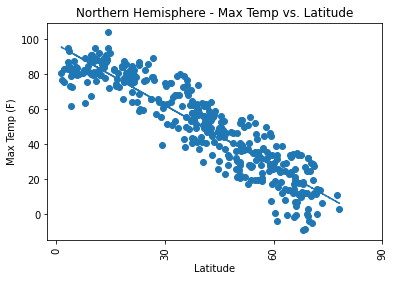

In [11]:
linregplot(northern_df["Lat"], northern_df["Max Temp"],"Latitude","Max Temp (F)", "Northern Hemisphere - Max Temp vs. Latitude","N")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

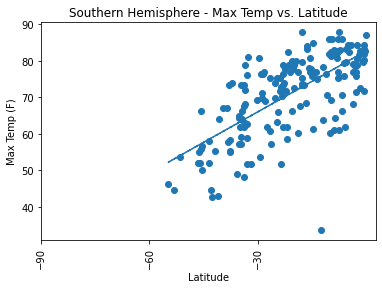

In [12]:
linregplot(southern_df["Lat"], southern_df["Max Temp"],"Latitude","Max Temp (F)", "Southern Hemisphere - Max Temp vs. Latitude","S")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

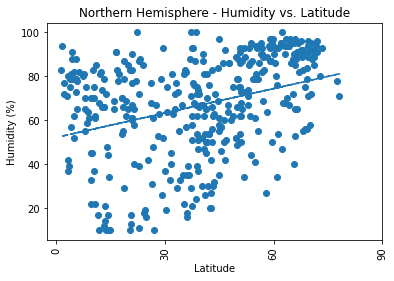

In [13]:
linregplot(northern_df["Lat"], northern_df["Humidity"],"Latitude","Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude","N")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

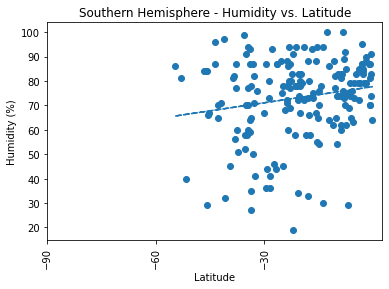

In [14]:
linregplot(southern_df["Lat"], southern_df["Humidity"],"Latitude","Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude","S")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

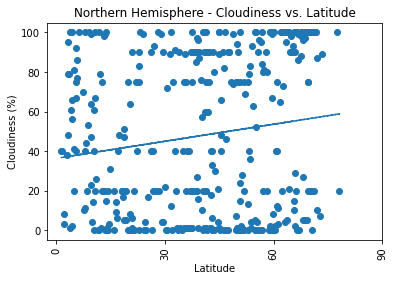

In [15]:
linregplot(northern_df["Lat"], northern_df["Cloudiness"],"Latitude","Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude","N")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

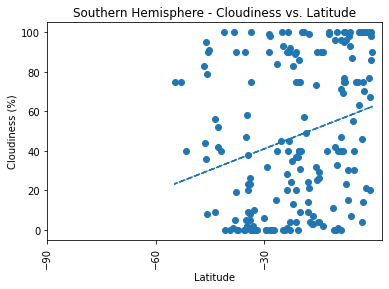

In [16]:
linregplot(southern_df["Lat"], southern_df["Cloudiness"],"Latitude","Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude","S")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

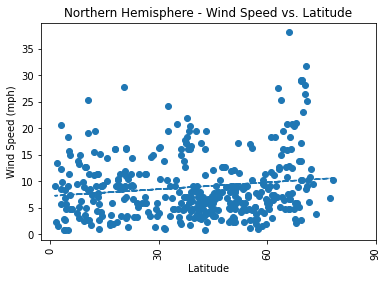

In [17]:
linregplot(northern_df["Lat"], northern_df["Wind Speed"],"Latitude","Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude","N")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

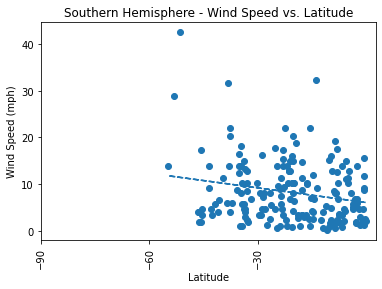

In [18]:
linregplot(southern_df["Lat"], southern_df["Wind Speed"],"Latitude","Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude","S")